In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import scipy.stats as stats


from kneed import KneeLocator
from sklearn.datasets import make_blobs

%matplotlib inline
rcParams['figure.figsize'] = 7, 4
plt.style.use('seaborn-whitegrid')

In [2]:
data = pd.read_csv('datasets/data_set_bio.csv')

In [3]:
data.set_index('uid')

,diameter,Vmb
uid,,
Y79_000,20.89430,-27.6512
Y79_001,16.85182,-24.8687
Y79_002,17.95220,-38.0629
Y79_003,15.81813,-12.6591
Y79_004,16.68500,-36.0233
...,...,...
Y79_090,19.86000,-16.1432
Y79_091,21.75000,-29.8170
Y79_092,16.14100,-27.6429


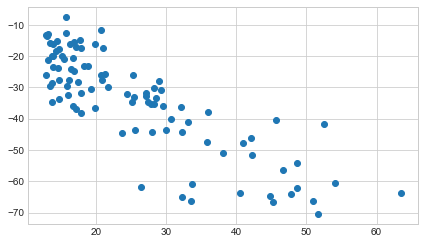

In [4]:
plt.scatter(data['diameter'], data['Vmb'])

In [5]:
data.head()

,uid,diameter,Vmb
0,Y79_000,20.89430,-27.6512
1,Y79_001,16.85182,-24.8687
2,Y79_002,17.95220,-38.0629
3,Y79_003,15.81813,-12.6591
4,Y79_004,16.68500,-36.0233


In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(data.drop('uid', axis = 1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(data.drop('uid', axis = 1))

In [9]:
data_feat = pd.DataFrame(scaled_features, columns = data.drop('uid', axis = 1).columns)
data_feat.shape

(95, 2)

In [10]:
kmeans = KMeans(n_clusters=4)

In [11]:
kmeans.fit(data.drop('uid', axis = 1))

KMeans(n_clusters=4)

In [12]:
y_kmeans = kmeans.predict(data.drop('uid', axis = 1))

In [13]:
kmeans.labels_

array([2, 1, 2, 1, 2, 2, 3, 2, 2, 0, 3, 2, 3, 2, 1, 0, 3, 1, 1, 1, 2, 1,
       2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 3, 3, 3, 3, 3, 0, 0, 3, 2, 3, 3,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2,
       2, 1, 0, 0, 2, 0, 2, 1, 2, 3, 0, 1, 3, 1, 1, 0, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 0, 3])

In [14]:
kmeans.cluster_centers_

array([[ 36.343588  , -43.82728   ],
       [ 15.79493106, -18.13565065],
       [ 21.65208899, -32.08608529],
       [ 44.55375967, -63.16235333]])

In [15]:
data['groups'] = y_kmeans

In [16]:
data.head(5)

,uid,diameter,Vmb,groups
0,Y79_000,20.89430,-27.6512,2
1,Y79_001,16.85182,-24.8687,1
2,Y79_002,17.95220,-38.0629,2
3,Y79_003,15.81813,-12.6591,1
4,Y79_004,16.68500,-36.0233,2


In [17]:
data[['diameter', 'groups']].groupby('groups').mean().reset_index()

,groups,diameter
0,0,36.343588
1,1,15.794931
2,2,21.652089
3,3,44.553760


In [18]:
y=pd.DataFrame(data.Vmb)

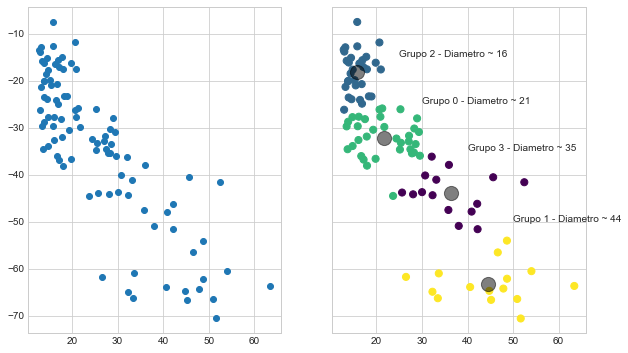

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.scatter(data['diameter'], data['Vmb'])
ax2.scatter(data['diameter'], data['Vmb'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.annotate('Grupo 2 - Diametro ~ 16', xy= (25,-15), xytext= (25,-15))
plt.annotate('Grupo 0 - Diametro ~ 21', xy= (30,-25), xytext= (30,-25))
plt.annotate('Grupo 3 - Diametro ~ 35', xy= (40,-35), xytext= (40,-35))
plt.annotate('Grupo 1 - Diametro ~ 44', xy= (50,-50), xytext= (50,-50))
plt.show()

In [20]:
print(silhouette_score(data.drop('uid', axis = 1), kmeans.labels_))

0.45055799351243886


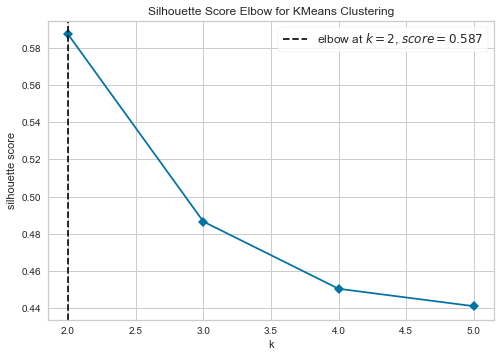

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(data.drop('uid', axis = 1))    
visualizer.poof()

C:\Users\Gustavo Cruz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 37686.23501993397
2 11843.81706020154
3 6617.404037499294
4 4849.1908301021695
5 3764.9858961829846
6 2855.0083465182997
7 2338.1021349062953
8 1950.4609151340733
9 1749.0105479579033
10 1527.811858415578


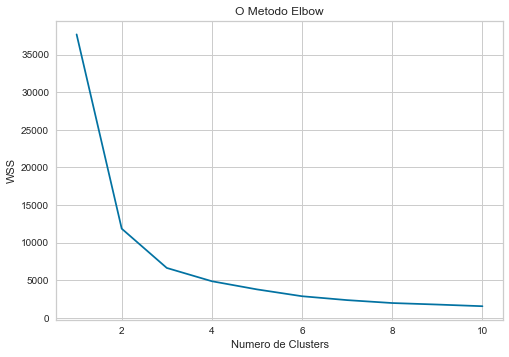

In [22]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(data.drop('uid',axis = 1))
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [25]:
fvalue, pvalue = stats.f_oneway(data['diameter'], data['Vmb'])
print("O valor F é: {}".format (fvalue))
print("O valor p é: {}".format(pvalue))

O valor F é: 854.1184135449032
O valor p é: 7.82734916877535e-72


In [26]:
w, pvalue = stats.bartlett(data['diameter'], data['Vmb'])
print(w, pvalue)

6.800964938888967 0.00911086193748569
